In [1]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [10]:
import pandas as pd 
df=pd.read_csv('imdb_top_1000.csv', encoding='utf8')
df['Gross']=df['Gross'].str.replace(',','') #remove column
df = df.dropna(subset=["Gross"]) #dropnNaN because was affecting conversion to int
df = df.dropna(subset=["Certificate"]) #dropnNaN because was affecting conversion to int
df['Gross'] = df['Gross'].astype(int) #convert to int
df.sort_values(["Released_Year"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5450000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,977375
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5450000
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1033895
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94 min,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,539540


In [11]:
def to_million(x):
  return x/1000000
df.Gross = df.Gross.apply(to_million)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5.450000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,0.977375
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5.450000
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1.033895
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94 min,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,0.539540


In [41]:
#attempting to group dataset by year and calculate average gross per genre

df['AVG_Gross'] = df.groupby('Certificate').Gross.transform('mean')
df.tail(8)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Gross
879,https://m.media-amazon.com/images/M/MV5BOTg4ZT...,Once Upon a Time... in Hollywood,2019,A,161 min,"Comedy, Drama",7.6,A faded television actor and his stunt double ...,83.0,Quentin Tarantino,Leonardo DiCaprio,Brad Pitt,Margot Robbie,Emile Hirsch,551309,142.502728,63.887133
585,https://m.media-amazon.com/images/M/MV5BY2QzYT...,Little Women,2019,U,135 min,"Drama, Romance",7.8,"Jo March reflects back and forth on her life, ...",91.0,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Eliza Scanlen,143250,108.101214,87.246581
884,https://m.media-amazon.com/images/M/MV5BOWVmZG...,The Peanut Butter Falcon,2019,PG-13,97 min,"Adventure, Comedy, Drama",7.6,Zak runs away from his care home to make his d...,70.0,Tyler Nilson,Michael Schwartz,Zack Gottsagen,Ann Owens,Dakota Johnson,66346,13.122642,36.947857
217,https://m.media-amazon.com/images/M/MV5BM2UwMD...,Ford v Ferrari,2019,UA,152 min,"Action, Biography, Drama",8.1,American car designer Carroll Shelby and drive...,81.0,James Mangold,Matt Damon,Christian Bale,Jon Bernthal,Caitriona Balfe,291289,117.624028,131.145955
484,https://m.media-amazon.com/images/M/MV5BMGUyM2...,The Irishman,2019,R,209 min,"Biography, Crime, Drama",7.9,An old man recalls his time painting houses fo...,94.0,Martin Scorsese,Robert De Niro,Al Pacino,Joe Pesci,Harvey Keitel,324720,7.000000,25.793599
84,https://m.media-amazon.com/images/M/MV5BOTdmNT...,1917,2019,R,119 min,"Drama, Thriller, War",8.3,"April 6th, 1917. As a regiment assembles to wa...",78.0,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,425844,159.227644,25.793599
463,https://m.media-amazon.com/images/M/MV5BMGUwZj...,Knives Out,2019,UA,130 min,"Comedy, Crime, Drama",7.9,A detective investigates the death of a patria...,82.0,Rian Johnson,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,454203,165.359751,131.145955
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173.837933,87.246581


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

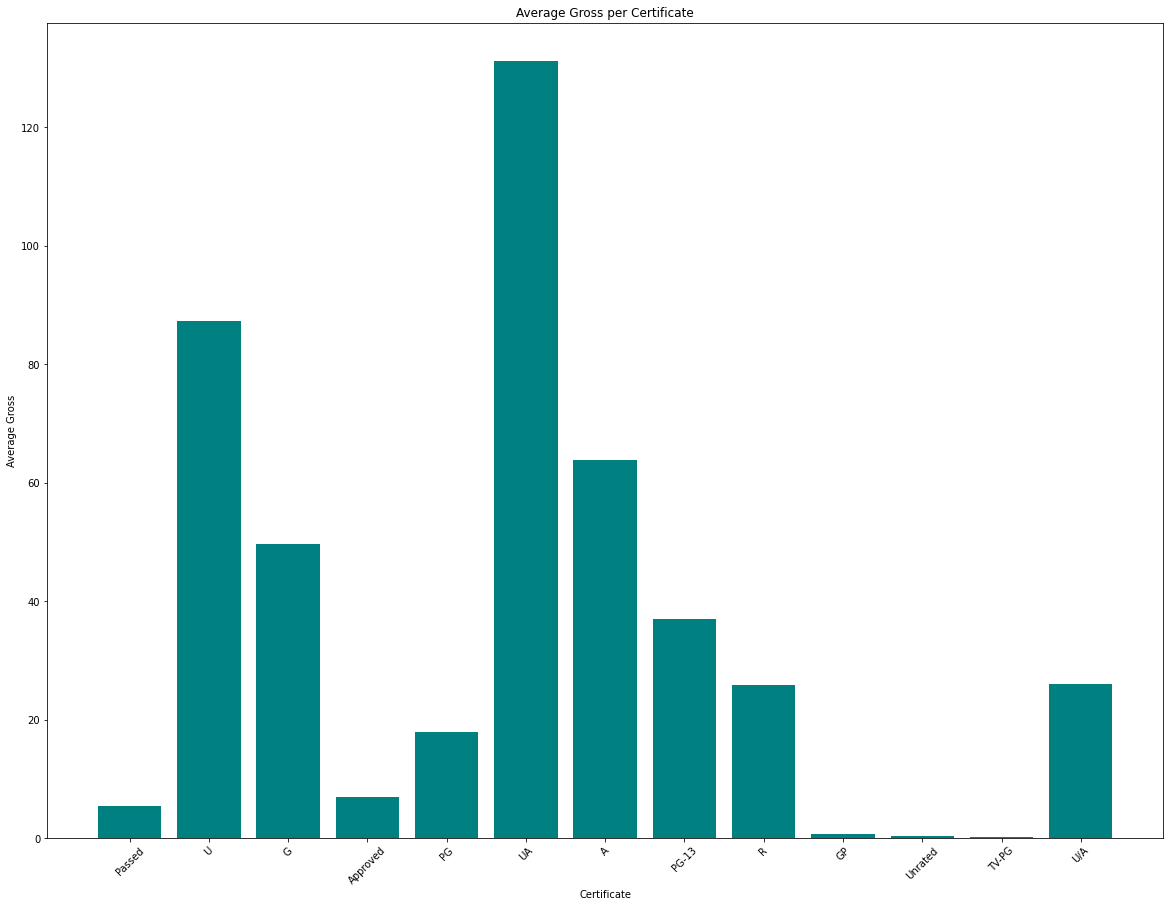

In [43]:
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(df["Certificate"], df["AVG_Gross"], color="teal")
plt.title("Average Gross per Certificate") 
plt.xlabel("Certificate")
plt.ylabel("Average Gross")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show() 

In [30]:
df1=df.groupby("Star1").size()
df1=df.groupby("Star2").size()
df1=df.groupby("Star3").size()
df1=df.groupby("Star4").size()

df1.shape

(739,)

In [40]:
df1.head()

Star4
Abdel Ahmed Ghili    1
Abigail Breslin      1
Adam Baldwin         1
Adrien Brody         1
Agnes Moorehead      1
dtype: int64

             IMDB_Rating  Meta_score  No_of_Votes     Gross  AVG_Gross
IMDB_Rating     1.000000    0.280894     0.562754  0.095786   0.065396
Meta_score      0.280894    1.000000     0.029744 -0.014801  -0.025490
No_of_Votes     0.562754    0.029744     1.000000  0.564084   0.262977
Gross           0.095786   -0.014801     0.564084  1.000000   0.348617
AVG_Gross       0.065396   -0.025490     0.262977  0.348617   1.000000


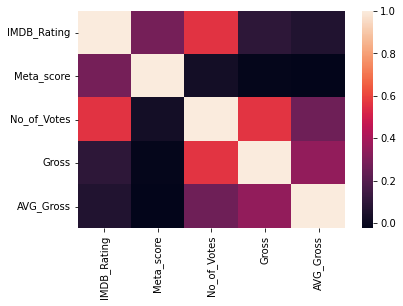

In [44]:
#EOD - 5 Relation between runtime and IMDB_Rating https://www.kaggle.com/code/akashideas/imdb-analysis

print(df.corr(method='pearson'))

sns.heatmap(df.corr(method='pearson'))